In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from importlib import reload
import curses  ####  pip install windows-curses
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import specsanalyzer
from specsanalyzer import SpecsAnalyzer

In [3]:
# reload(specsanalyzer)
spa = SpecsAnalyzer()

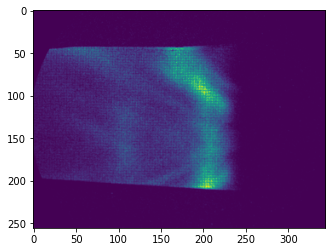

In [4]:
with open("../tests/data/dataEPFL/R9132/Data9132_RAWDATA.tsv") as file:
    tsv_data = np.loadtxt(file, delimiter="\t")
plt.figure()
plt.imshow(tsv_data)

New correction Matrix


(256, 344)

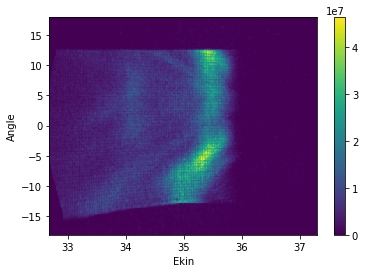

In [5]:
# Testing convert and crop on the imported data
spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")

lens_mode = "WideAngleMode"
kinetic_energy = 35.0
pass_energy = 35.0
work_function = 4.2

res_xarray = spa.convert_image(
    tsv_data, lens_mode, kinetic_energy, pass_energy, work_function
)
plt.figure()
res_xarray.plot(cmap="viridis", vmin=0)
res_xarray.to_numpy().shape

In [6]:
with open("../tests/data/dataEPFL/R9132/Data9132_IGOR_corrected.tsv") as file:
    ref_data = np.loadtxt(file, delimiter="\t")
    ref_data = ref_data

import specsanalyzer.convert
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm
from specsanalyzer.convert import calculate_matrix_correction

spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
config_dict = spa.config
lens_mode = "WideAngleMode"
kinetic_energy = 35
pass_energy = 35
work_function = 4.3
binning = 4

(
    ek_axis,
    angle_axis,
    angular_correction_matrix,
    e_correction,
    jacobian_determinant,
) = calculate_matrix_correction(
    lens_mode,
    kinetic_energy,
    pass_energy,
    work_function,
    binning,
    config_dict,
)

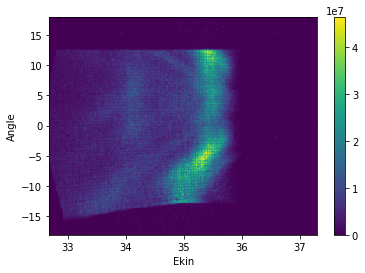

In [7]:
# this test would not work in the case of upsampling in python..


ref_xarray = xr.DataArray(
    data=ref_data,
    coords={"Angle": angle_axis, "Ekin": ek_axis},
    dims=["Angle", "Ekin"],
)
plt.figure()
ref_xarray.plot()

In [8]:
# calcualte the difference xarray, normalized to the ref pixelwise intensity
ff_xarray = (res_xarray - ref_xarray) / ref_xarray

Text(0.5, 1.0, 'Difference/Mean pixel intensity')

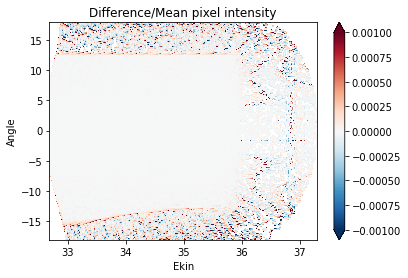

In [23]:
plt.figure()
ff_xarray.plot(cmap="RdBu_r", vmax=1e-3)
plt.title("Difference/Mean pixel intensity")

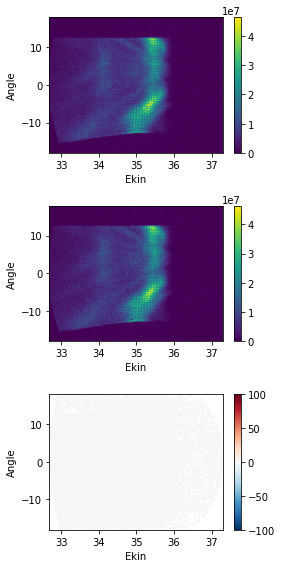

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(4, 8))
subplot1 = ref_xarray.plot(ax=ax1, cmap="viridis", vmin=0)
subplot2 = res_xarray.plot(ax=ax2, cmap="viridis", vmin=0)
subplot3 = ff_xarray.plot(cmap="RdBu_r", ax=ax3, vmax=100)
plt.tight_layout()

In [11]:
%timeit res_xarray = spa.convert_image(tsv_data, lens_mode, kinetic_energy, pass_energy, work_function)

New correction Matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correction matrix
Old correc

In [12]:
%%timeit
convert1 = specsanalyzer.convert.physical_unit_data(
    tsv_data,
    angular_correction_matrix,
    e_correction,
    jacobian_determinant,
)

5.32 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
config_dict = spa.config
# config_dict['calib2d_dict']['old_scans_params']
config_dict.keys()

dict_keys(['calib2d_file', 'nx_pixel', 'ny_pixel', 'pixel_size', 'magnification', 'Ang_Offset_px', 'E_Offset_px', 'apply_fft_filter', 'crop', 'fft_filter_peaks', 'binning', 'calib2d_dict'])

In [14]:
matrix_dict = spa.correction_matrix_dict
matrix_dict.keys()

dict_keys(['WideAngleMode'])

In [15]:
spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
config_dict = spa.config
lens_mode = "WideAngleMode"
kinetic_energy = 35
pass_energy = 35
work_function = 4.3
binning = 4
res_xarray = spa.convert_image(
    tsv_data, lens_mode, kinetic_energy, pass_energy, work_function
)
kinetic_energy = 30
pass_energy = 35
work_function = 4.3
binning = 4
res_xarray = spa.convert_image(
    tsv_data, lens_mode, kinetic_energy, pass_energy, work_function
)

New correction Matrix
New correction Matrix


In [16]:
matrix_dict = spa.correction_matrix_dict
matrix_dict.keys()

dict_keys(['WideAngleMode'])

In [17]:
matrix_dict["WideAngleMode"].keys()

dict_keys([35, 30])